# Programmatic Data Wrangling - TMDB

This file is for exploratory data analysis of the TMDB dataset. It showcases: 

- **Visualisations** showcasing insights drawn from the data

- **Keypoints** drawn from the data

- **Individual** movie insights

### Data overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv('TMDB_movies.csv')

In [3]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [4]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


Noticed that release_date is an object. Converted it to datetime. 

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [7]:
df['release_date'].head(1)

0   2009-12-10
Name: release_date, dtype: datetime64[ns]

Some potential insights:
- Address missing values and outliers.
- Extract relevant information from columns containing lists of dictionaries.
- Standardise formatting and handle inconsistencies.
- Consider whether certain columns are essential for analysis and remove unnecessary ones.


### Data preparation - Dictionaries

There are many dictionary values in the data. Some of which are empty and will not show up in a null check. These need to be checked and cleaned.

Additionally, there are many key values such as "id" that are not useful for analysis. These should be dropped to help with ease of EDA. 

Dictionary columns:

- genres
- keywords
- production_companies
- production_countries
- spoken_languages

In [8]:
 # Applying function to dictionary columns to convert them into strings. 

import ast

dict_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']

for col in dict_columns:
    if df[col].dtype == 'O': #If object type
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
        df[col] = df[col].apply(lambda x: [item['name'] for item in x] if x else [])
        df[col] = df[col].apply(lambda x: ', '.join(x) if x else '')


In [9]:
# Replacing the empty strings and numbers with nulls for ease of analysis
df.replace(0, np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

<Axes: >

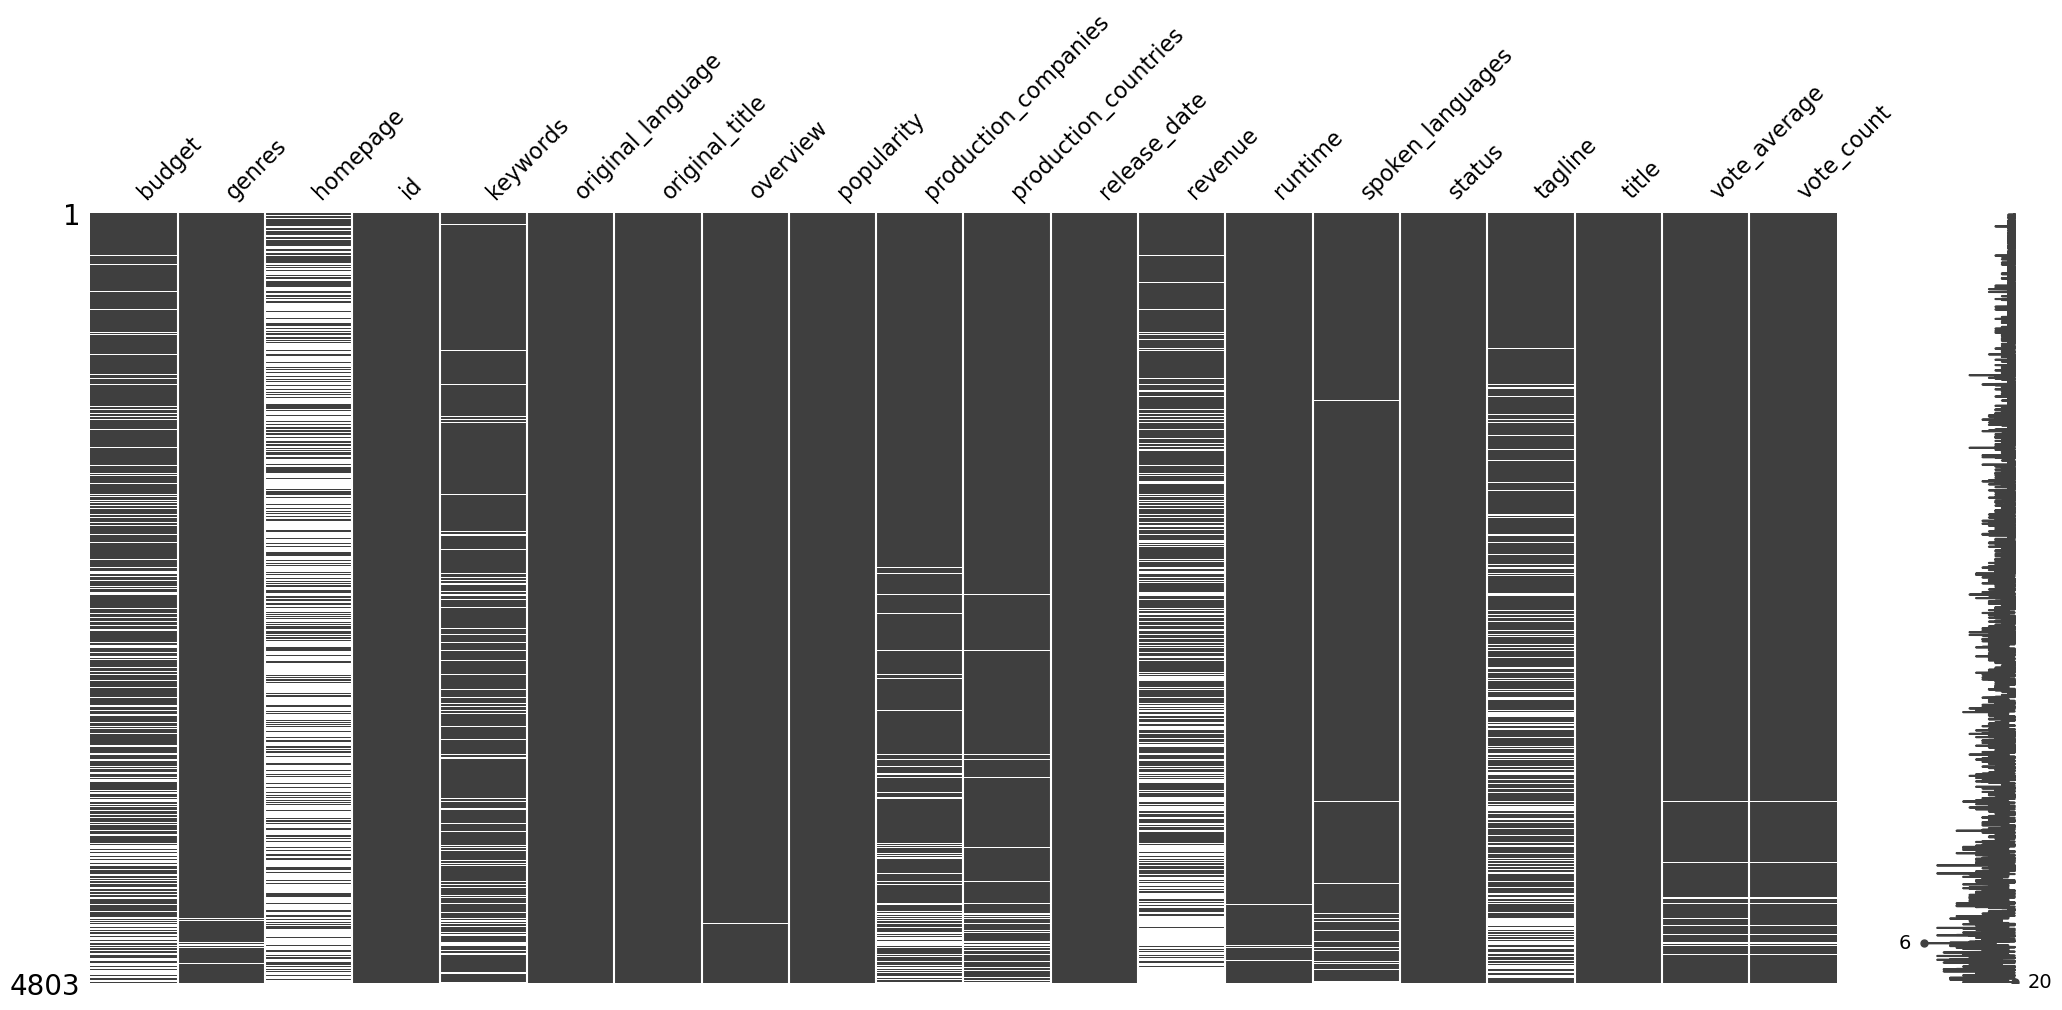

In [10]:
# All true nulls are now showing as null

msno.matrix(df)

In [11]:
df.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

Status columns with 'Post production' and 'Rumored' could be a major cause of missing values. Lets see.

<Axes: >

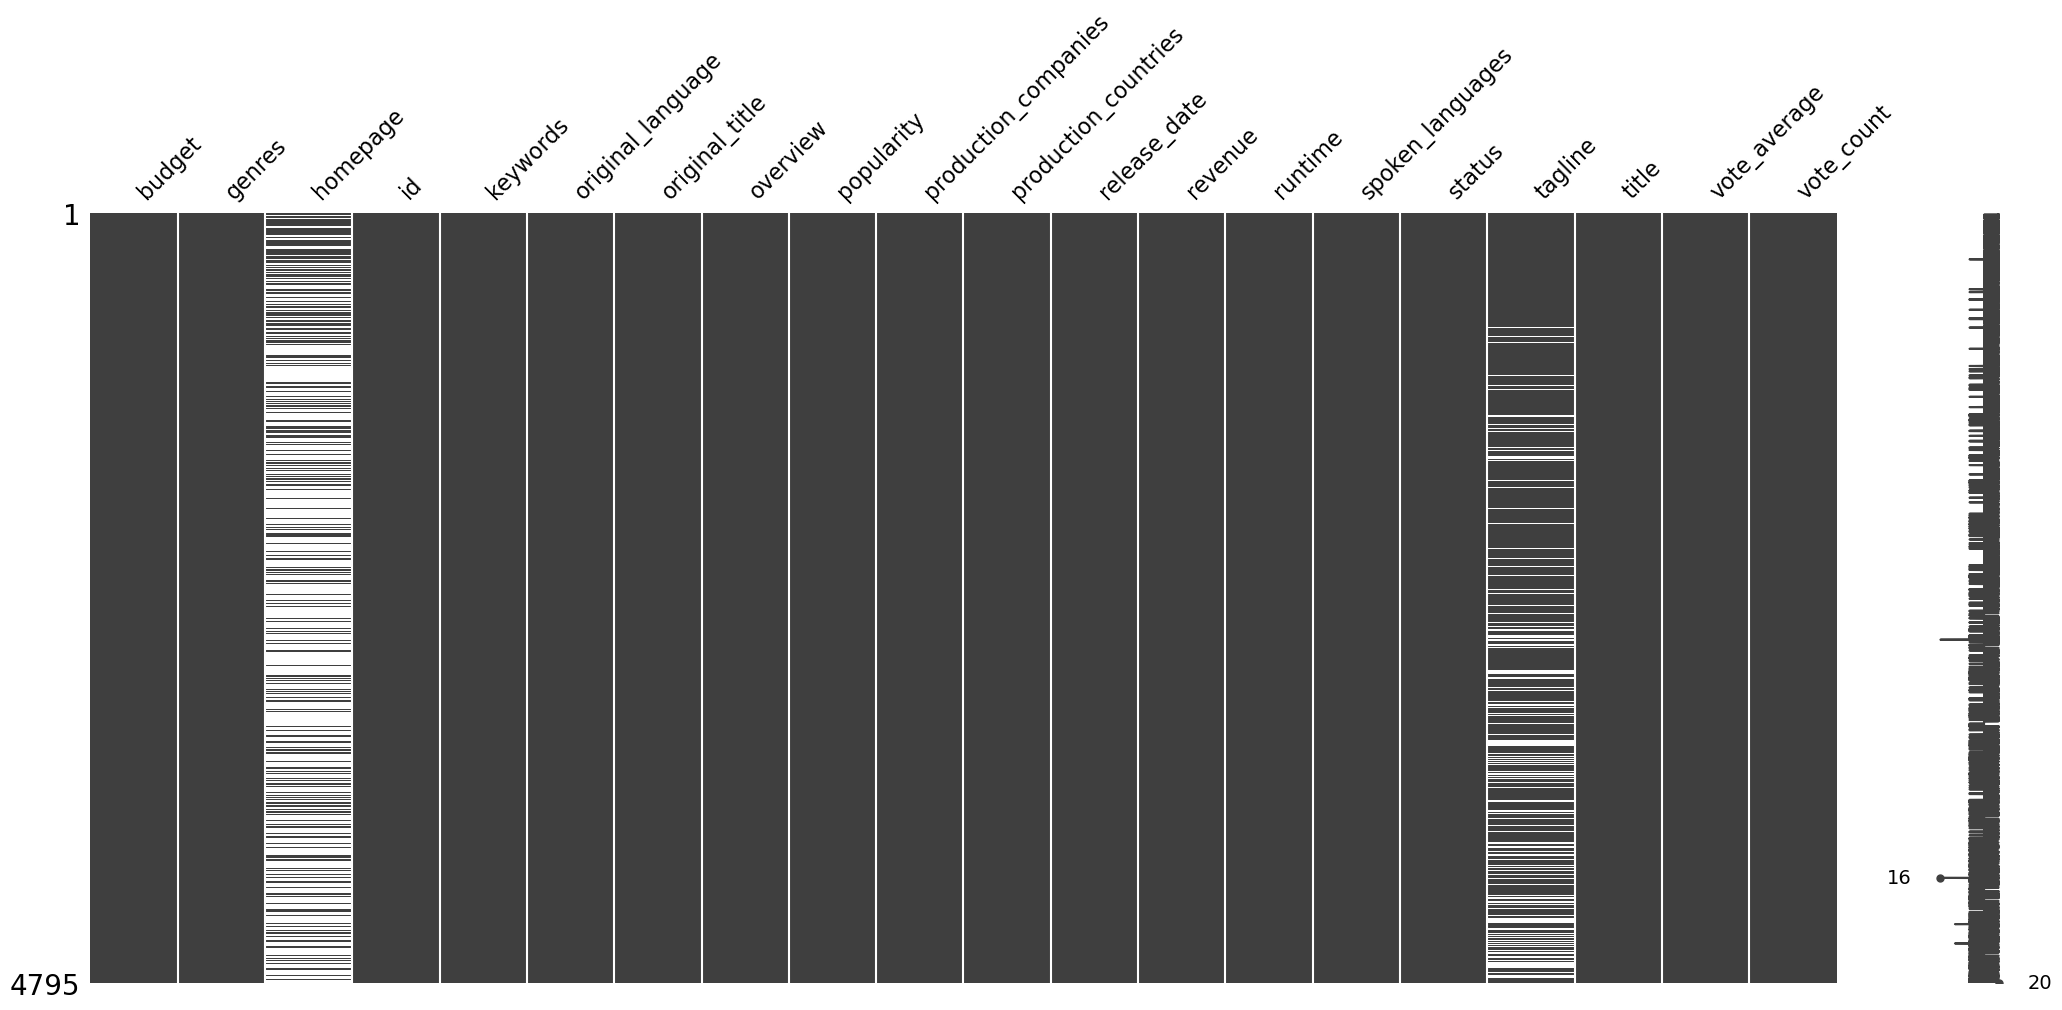

In [13]:
# Create a new data frame where status is 'Released'.
df_2 = pd.read_csv('TMDB_movies.csv')
df_released = df_2[df_2['status'] == 'Released']

msno.matrix(df_released)

As expected now we have no null values in budget or revenue columns.

In [14]:
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() # How many nulls in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [15]:
null_vals(df_released)

,null,percent
homepage,3086,64.359
tagline,838,17.477
overview,3,0.063
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


In [16]:
null_vals(df)

,null,percent
homepage,3091,64.356
revenue,1427,29.711
budget,1037,21.591
tagline,844,17.572
keywords,412,8.578
production_companies,351,7.308
production_countries,174,3.623
spoken_languages,87,1.811
vote_average,63,1.312
vote_count,62,1.291


In [17]:
# Updating the released data frame

df_released_copy = df_released.copy()


dict_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']

for col in dict_columns:
    if df_released_copy[col].dtype == 'O': #If object type
        df_released_copy[col] = df_released_copy[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
        df_released_copy[col] = df_released_copy[col].apply(lambda x: [item['name'] for item in x] if x else [])
        df_released_copy[col] = df_released_copy[col].apply(lambda x: ', '.join(x) if x else '')

### Data preparation - Numerical

Now we have the dictionary data acessiable as strings and empty strings nullified. 0 values are also nullified. 

In [18]:
# Show the rows containing null values for runtime 
df_released[df_released['runtime'].isnull()].head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


In [19]:
# Show the rows containing null values for release_date 
df_released[df_released['release_date'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


<Axes: >

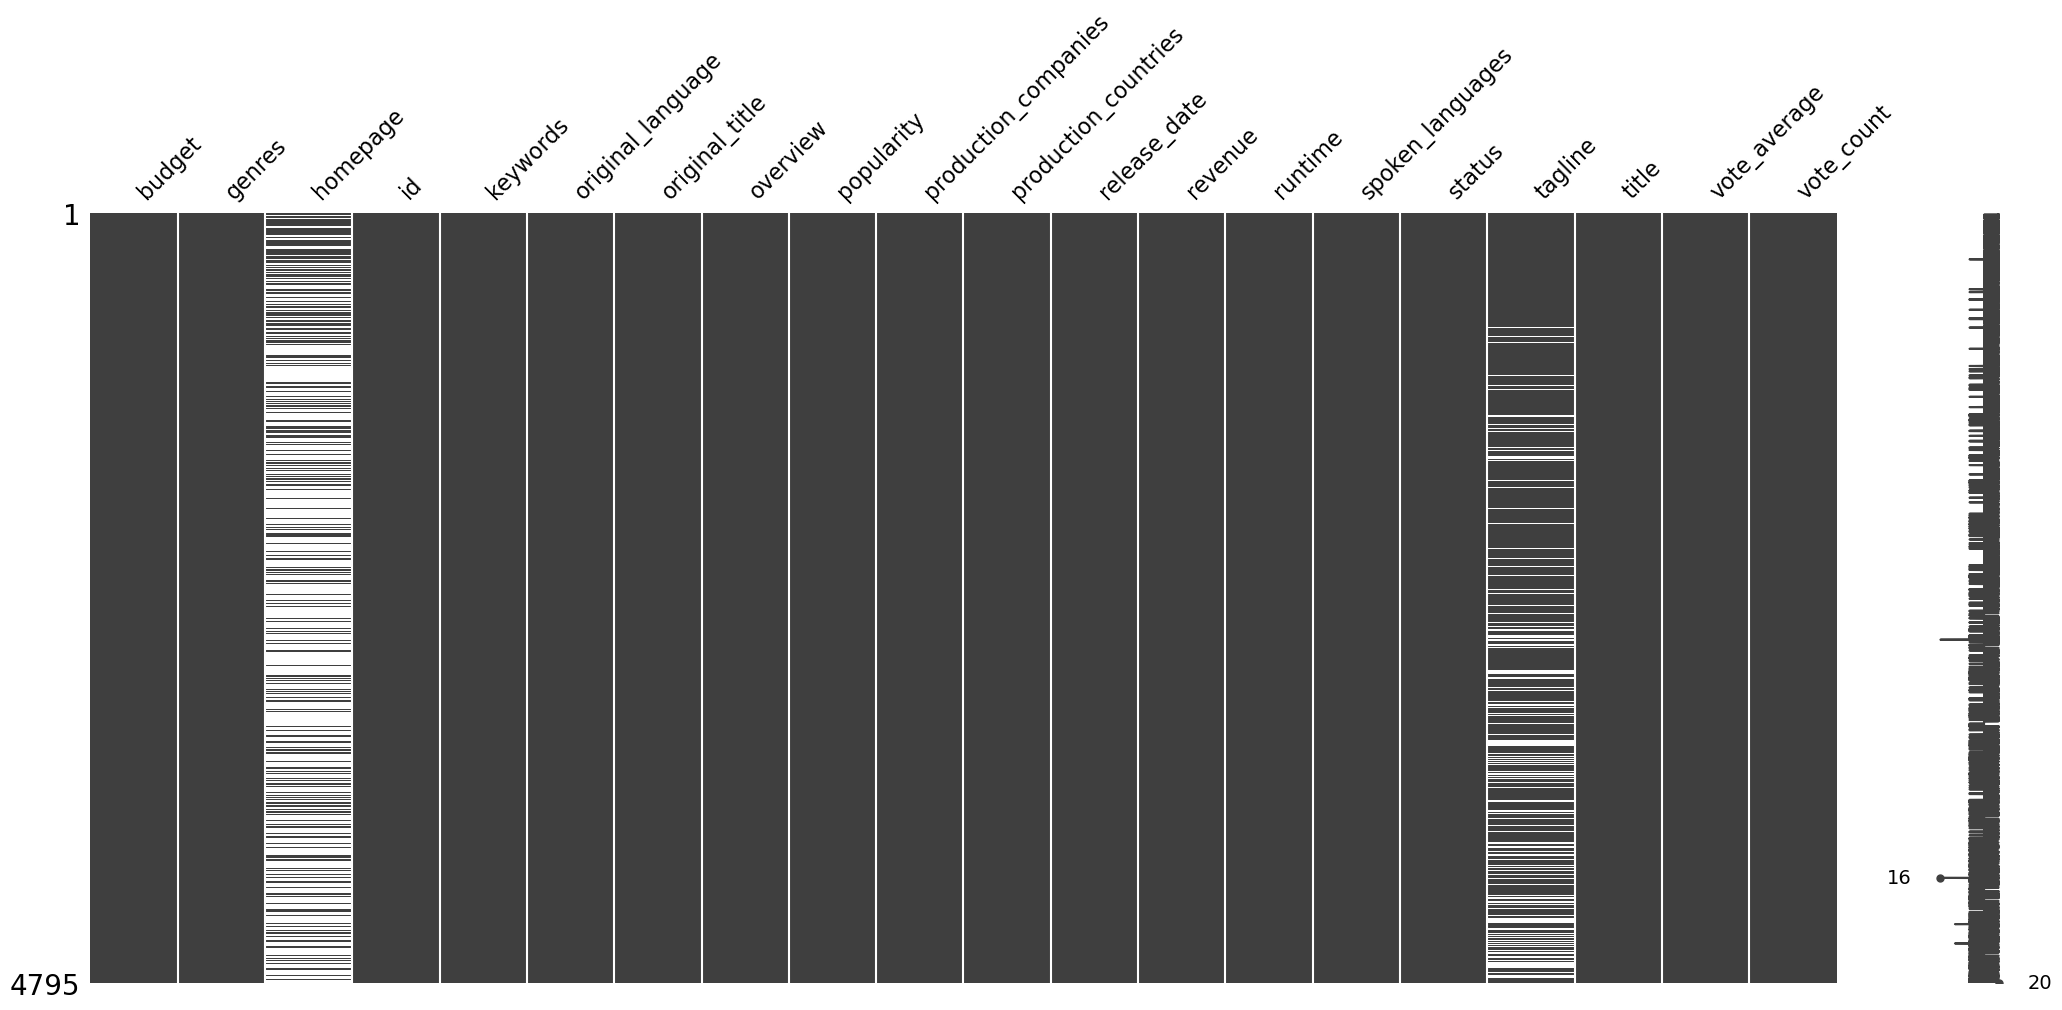

In [20]:
msno.matrix(df_released)

Released is clean. Now lets focus on the original data set

In [21]:
# Dropping redundant columns
df.drop(columns=['homepage', 'tagline'], inplace=True)

In [22]:
# Filling null overviews with empty placeholder
df['overview'].fillna("", inplace=True);

In [38]:
# Imputing nulls in runtime & release date
df['runtime'].fillna(df['runtime'].mean(), inplace=True) # Using mean
df['release_date'].fillna(method='ffill', inplace=True) # Using forward fill

In [23]:
# Imputing nulls in vote_count & vote_average using the mean as it preserves the data distribution
df['vote_count'].fillna(df['vote_count'].mean(), inplace=True)
df['vote_average'].fillna(df['vote_average'].mean(), inplace=True)

<Axes: >

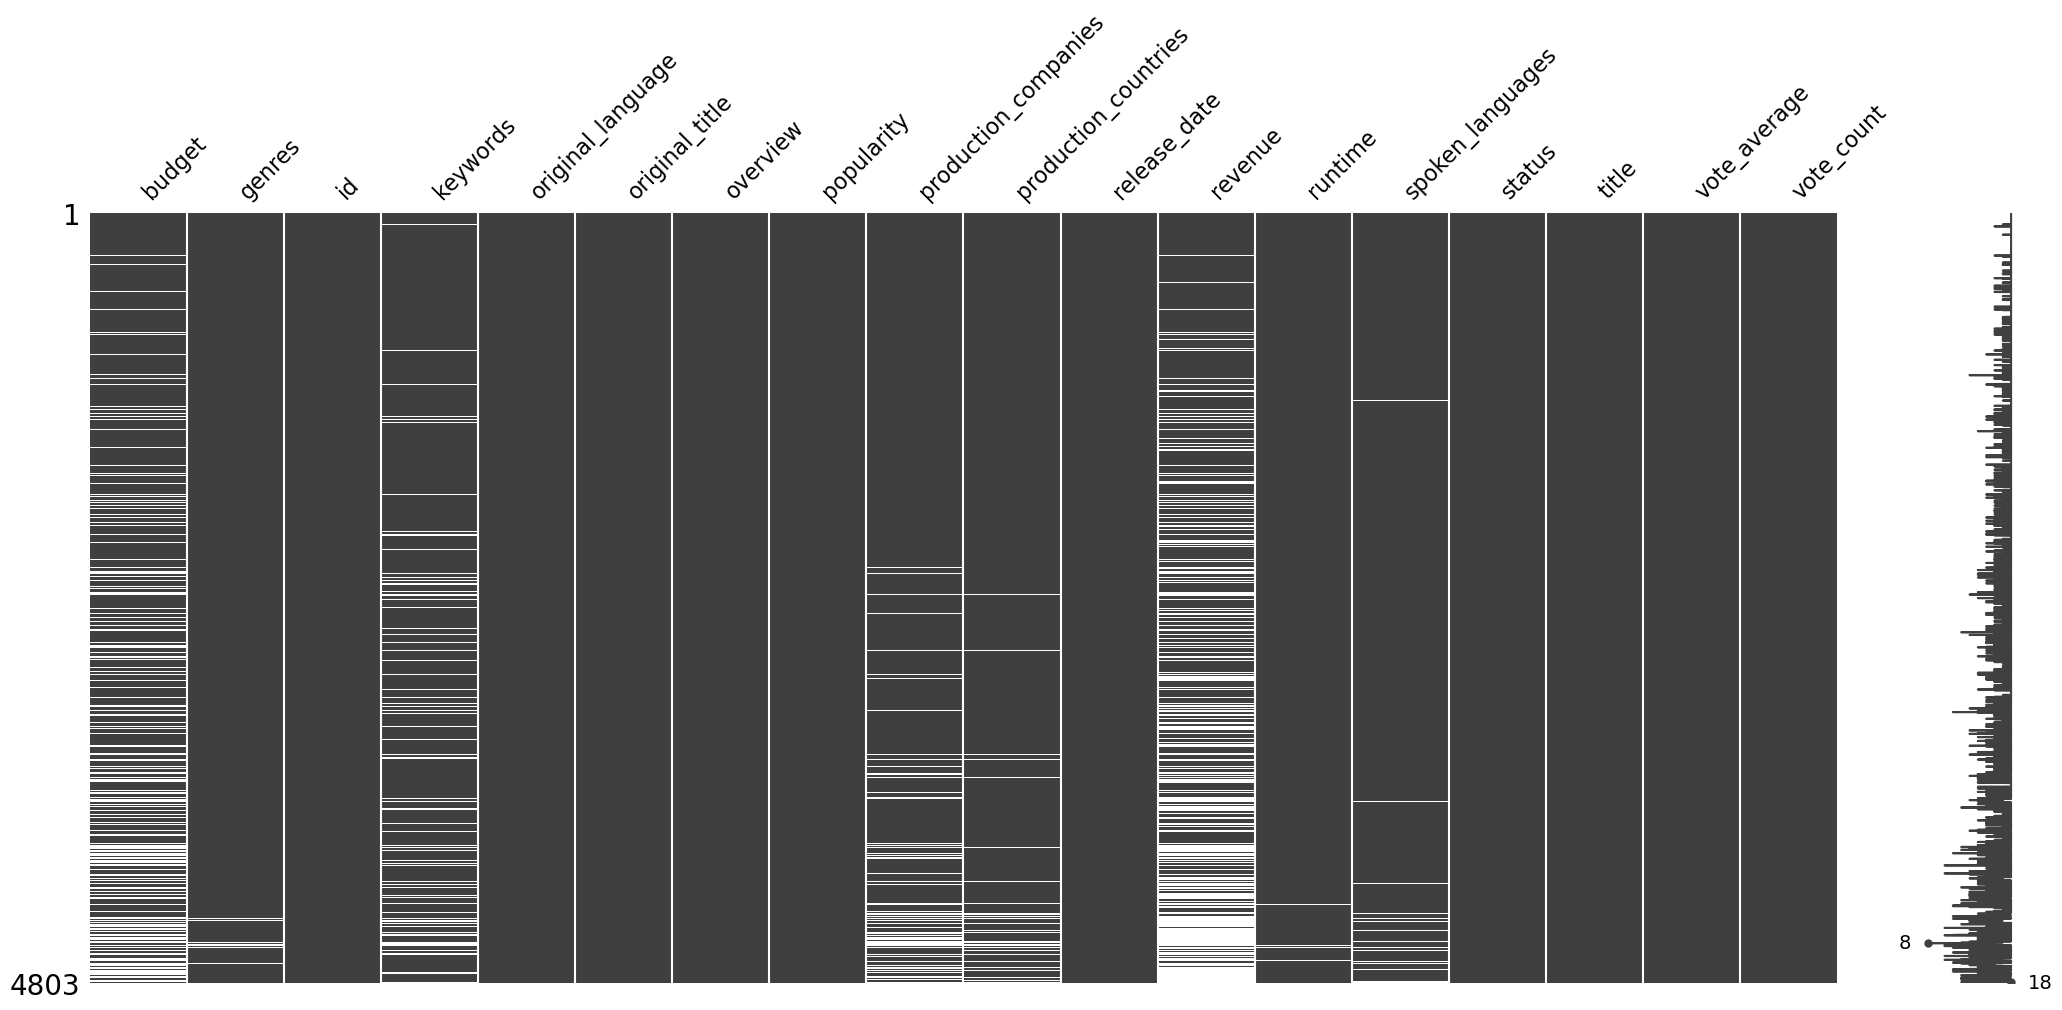

In [24]:
# Plotting graph to show where the missing values are
msno.matrix(df)

Lets see if any linear correlation exists between numerical values.

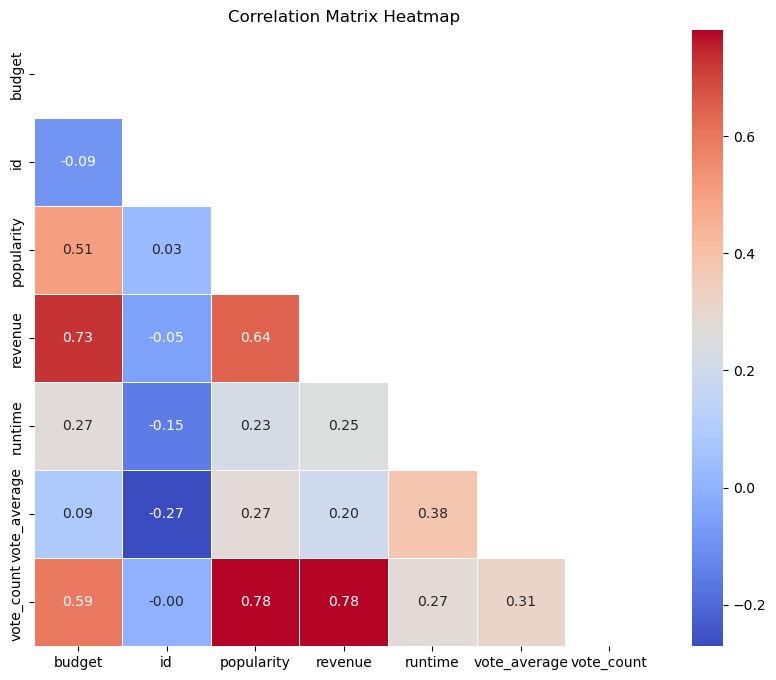

In [25]:
numerical_df = df_released.select_dtypes(include=['number'])

corr = numerical_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, mask=mask, cbar_kws={'alpha': 0.0})
plt.title('Correlation Matrix Heatmap')
plt.show()


Conclusion:

- Strong correlation between revenue and budget
- Strong correlation between revenue and vote_count
- Many missing values in budget so that cannot be used for regression
- Enough values in vote_count so that can be used for regression

Steps:

- Predict revenue values using vote_count

In [47]:
# Check for missing values in 'budget' and 'revenue' 
missing_budget = df['budget'].isnull()
missing_revenue = df['revenue'].isnull()

both_missing_count = (missing_budget & missing_revenue).sum()

either_missing_count = (missing_budget | missing_revenue).sum()

print("Number of rows where both 'budget' and 'revenue' are missing:", both_missing_count)
print("Number of rows where either 'budget' or 'revenue' is missing:", either_missing_count)


Number of rows where both 'budget' and 'revenue' are missing: 890
Number of rows where either 'budget' or 'revenue' is missing: 1574


Using linear regression we can impute revenue values. 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function created with the help of generative AI.
# The function takes the dataset, a target column to impute and a list of specified columns to use for prediction.
# This funciton uses the vote_count to impute the missing values in revenue as they are highly correlated. 

def impute_with_linear_regression(df, target_column, specified_columns):
    # Creates a training set that contains non-null values for the target column
    # Gets the missing data from target column separating it from the training set

    train_data = df.dropna(subset=[target_column])
    missing_data = df[df[target_column].isnull()]

    # Selects the features (columns) to use for prediction
    X_train = train_data[specified_columns]
    y_train = train_data[target_column]
    X_missing = missing_data[specified_columns]

    # Check if there are missing values in the specified columns
    if X_train.isnull().any().any() or X_missing.isnull().any().any():
        raise ValueError("There are missing values in the specified columns.")

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Predict the missing values
    predicted_values = model.predict(X_missing)

    # Impute the missing values in the original DataFrame
    df.loc[df[target_column].isnull(), target_column] = predicted_values

# Specify the columns you want to use for imputation
specified_columns = ['vote_count']

# Call the function to impute missing values in the 'revenue' column
impute_with_linear_regression(df, 'revenue', specified_columns)



<Axes: >

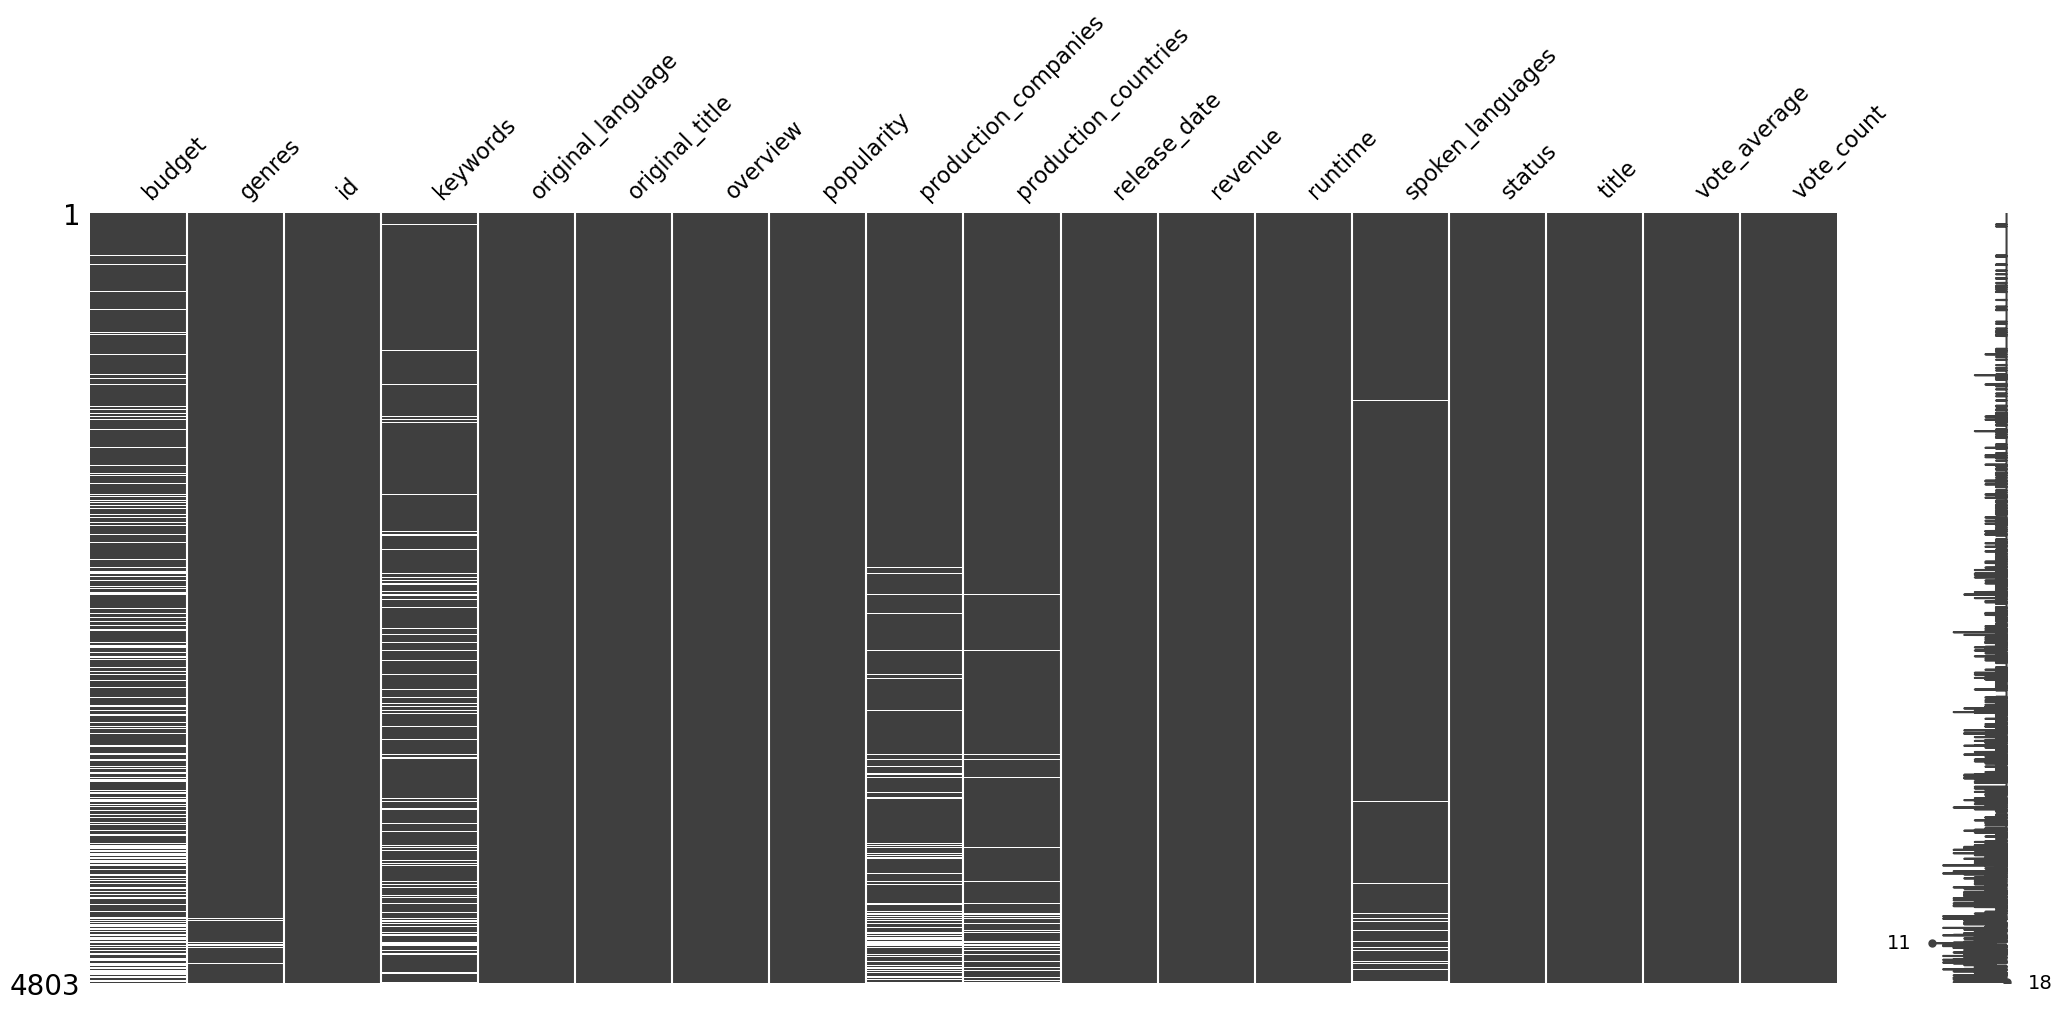

In [49]:
msno.matrix(df)

Revenue is now clean and imputed with vote_count.

### Data visualisation

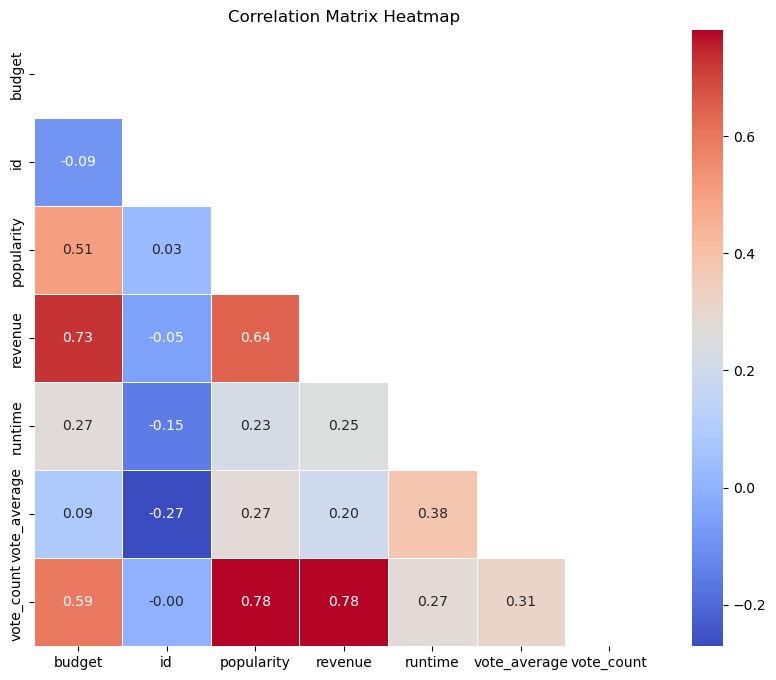

In [52]:
numerical_df = df_released.select_dtypes(include=['number'])

corr = numerical_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, mask=mask, cbar_kws={'alpha': 0.0})
plt.title('Correlation Matrix Heatmap')
plt.show()


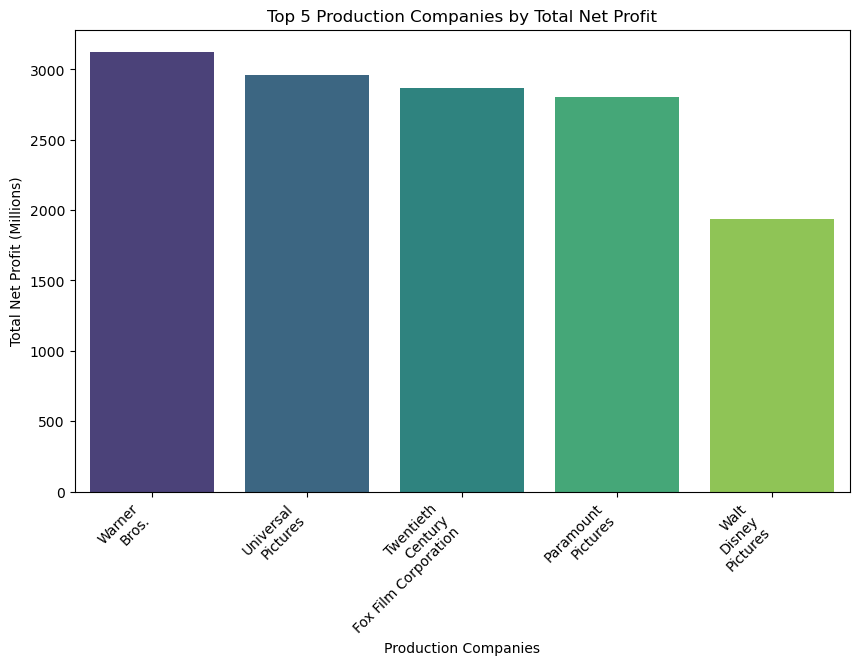

In [61]:
# Calculate net profit for each film
df['net_profit'] = df['revenue'] - df['budget']

# Splitting multiple production companies into separate rows
split_df = df.assign(production_companies=df['production_companies'].str.split(', ')).explode('production_companies')

# Group by production companies and sum the net profit
production_company_net_profit = split_df.groupby('production_companies')['net_profit'].sum()

# Sort the production companies by total net profit in descending order
sorted_production_companies = production_company_net_profit.sort_values(ascending=False)

# Get the top 5 most successful production companies by net profit
top_5_production_companies = sorted_production_companies.head(5)

top_5_production_companies.index = ['\n'.join(label.split(' ', 2)) for label in top_5_production_companies.index]


# Create a vertical bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_5_production_companies.index, y=top_5_production_companies.values / 1e7, palette='viridis')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Production Companies')
plt.ylabel('Total Net Profit (Millions)')
plt.title('Top 5 Production Companies by Total Net Profit')

# Display the plot
plt.show()


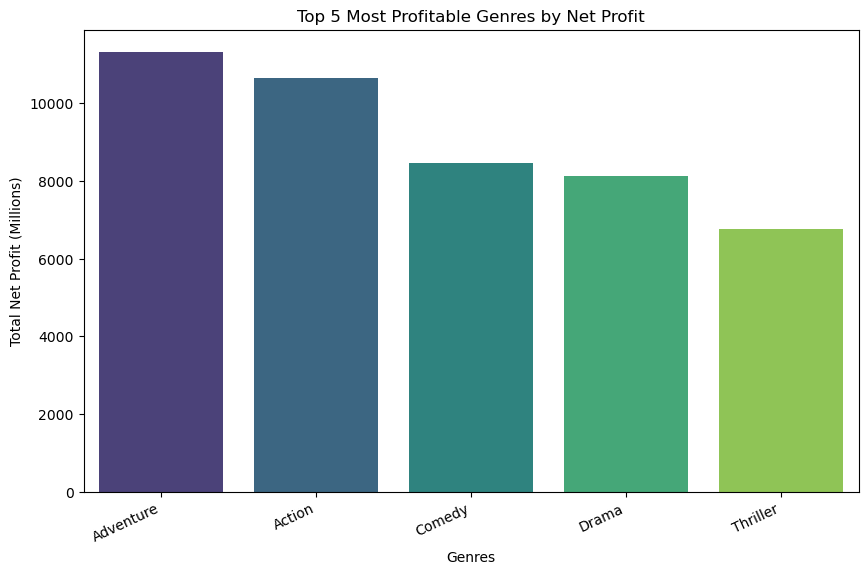

In [62]:
# Calculate net profit for each film
df['net_profit'] = df['revenue'] - df['budget']

# Splitting multiple genres into separate rows
split_df = df.assign(genres=df['genres'].str.split(', ')).explode('genres')

# Group by genres and sum the net profit
genre_net_profit = split_df.groupby('genres')['net_profit'].sum()

# Sort the genres by total net profit in descending order
sorted_genres = genre_net_profit.sort_values(ascending=False)

# Get the top 5 most profitable genres
top_5_genres = sorted_genres.head(5)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_5_genres.index, y=top_5_genres.values / 1e7, palette='viridis')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=25, ha='right')

# Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Total Net Profit (Millions)')
plt.title('Top 5 Most Profitable Genres by Net Profit')

# Display the plot
plt.show()


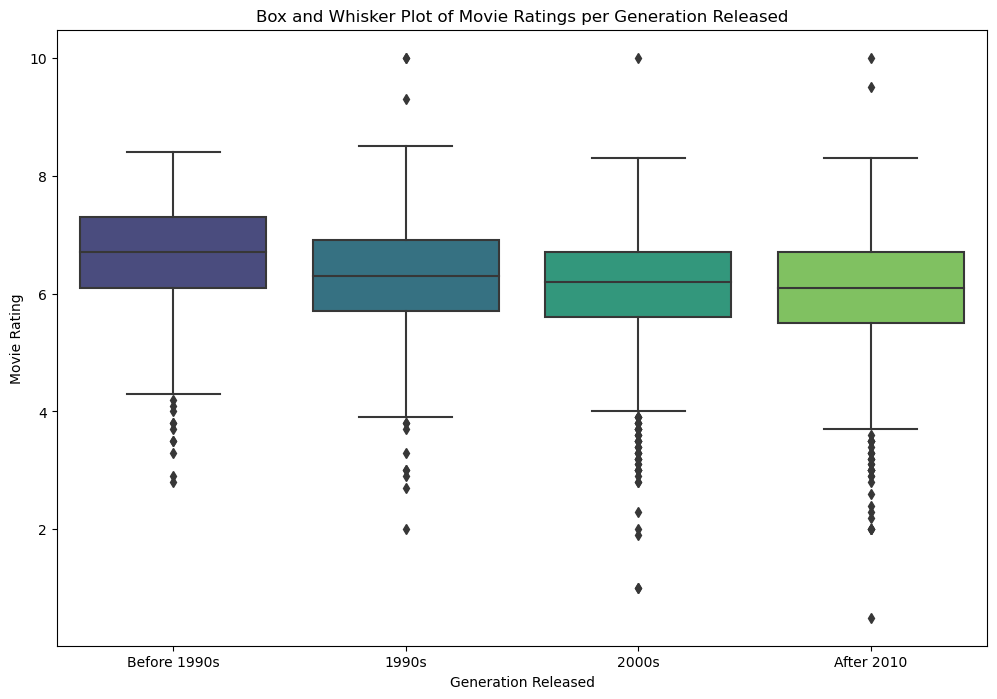

In [63]:
# Categorising release years into generations
def categorise_generation(year):
    if year < 1990:
        return 'Before 1990s'
    elif 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    else:
        return 'After 2010'

df['generation'] = df['release_date'].dt.year.apply(categorise_generation)

# Define the order of generations
generation_order = ['Before 1990s', '1990s', '2000s', 'After 2010']

# Create a box and whisker plot with specified generation order
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x='generation', y='vote_average', data=df, order=generation_order, palette='viridis')

# Adding labels and title
plt.xlabel('Generation Released')
plt.ylabel('Movie Rating')
plt.title('Box and Whisker Plot of Movie Ratings per Generation Released')

# Display the plot
plt.show()



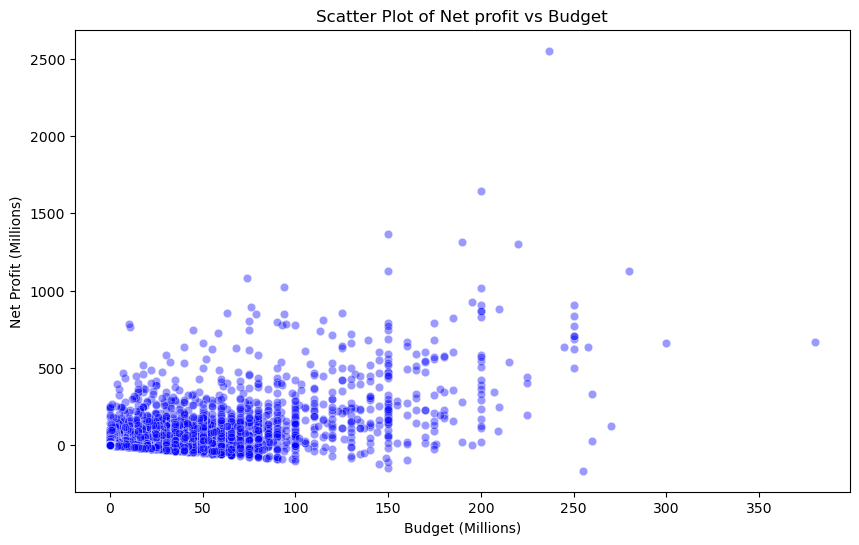

In [27]:
# Create a scatter plot
df_released_copy = df_released.copy()

df_released_copy['net_profit'] = df_released_copy['revenue'] - df_released_copy['budget']

plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x=df_released_copy['budget'] / 1e6, y=df_released_copy['net_profit'] / 1e6, alpha=0.4, color='blue')

# Adding labels and title
plt.xlabel('Budget (Millions)')
plt.ylabel('Net Profit (Millions)')
plt.title('Scatter Plot of Net profit vs Budget')

# Display the plot
plt.show()

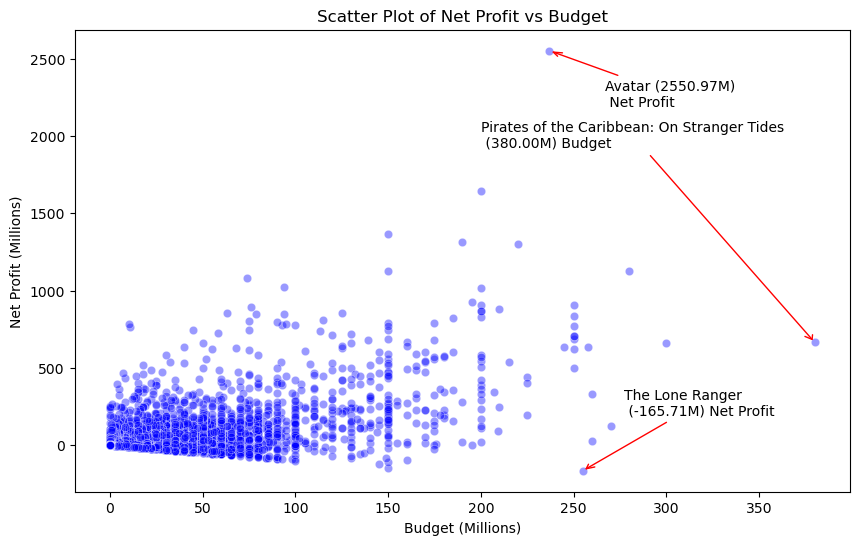

In [32]:
df_released = df_released.copy()

df_released['net_profit'] = df_released['revenue'] - df_released['budget']

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x=df_released['budget'] / 1e6, y=df_released['net_profit'] / 1e6, alpha=0.4, color='blue')

# Find the film with the highest net profit
max_net_profit_film = df_released.loc[df_released['net_profit'].idxmax()]

# Annotate the point with the highest net profit
plt.annotate(f'{max_net_profit_film["title"]} ({max_net_profit_film["net_profit"] / 1e6:.2f}M)\n Net Profit',
             xy=(max_net_profit_film['budget'] / 1e6, max_net_profit_film['net_profit'] / 1e6),
             xytext=(40, -40),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='red', mutation_scale=15, mutation_aspect=0.5))

max_budget_film = df_released.loc[df_released['budget'].idxmax()]



plt.annotate(f'{max_budget_film["title"]}\n ({max_budget_film["budget"] / 1e6:.2f}M) Budget',
             xy=(max_budget_film['budget'] / 1e6, max_budget_film['net_profit'] / 1e6),
             xytext=(-240
                     , 140),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='red', mutation_scale=15, mutation_aspect=0.5))

min_net_profit_film = df_released.loc[df_released['net_profit'].idxmin()]

plt.annotate(f'{min_net_profit_film["title"]} \n ({min_net_profit_film["net_profit"] / 1e6:.2f}M) Net Profit',
             xy=(min_net_profit_film['budget'] / 1e6, min_net_profit_film['net_profit'] / 1e6),
             xytext=(30, 40),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='red', mutation_scale=15, mutation_aspect=0.5))

# Adding labels and title
plt.xlabel('Budget (Millions)')
plt.ylabel('Net Profit (Millions)')
plt.title('Scatter Plot of Net Profit vs Budget')

# Display the plot
plt.show()


### Movies of interest

In [66]:
def format_movie_info(movie_df):
    """
    Formats the budget, revenue, and net profit columns of a movie DataFrame.
    """
    formatted_df = movie_df.copy()

    formatted_df['budget'] = formatted_df['budget'].apply(lambda x: '${:,.2f}'.format(x)) # Thousands separator
    formatted_df['revenue'] = formatted_df['revenue'].apply(lambda x: '${:,.2f}'.format(x))
    formatted_df['net_profit'] = formatted_df['net_profit'].apply(lambda x: '${:,.2f}'.format(x))

    return formatted_df


In [67]:
potc_formatted = format_movie_info(df_released[df_released['title'] == 'Pirates of the Caribbean: On Stranger Tides'])
avatar_formatted = format_movie_info(df_released[df_released['title'] == 'Avatar'])
tlr_formatted = format_movie_info(df_released[df_released['title'] == 'The Lone Ranger'])

In [68]:
potc = df_released[df_released['title'] == 'Pirates of the Caribbean: On Stranger Tides']
avatar = df_released[df_released['title'] == 'Avatar']
tlr = df_released[df_released['title'] == 'The Lone Ranger']

columns_to_display = ['title', 'budget', 'revenue', 'net_profit'] 

In [69]:
potc_formatted[columns_to_display]

,title,budget,revenue,net_profit
17,Pirates of the Caribbean: On Stranger Tides,"$380,000,000.00","$1,045,713,802.00","$665,713,802.00"


In [70]:
avatar_formatted[columns_to_display]

,title,budget,revenue,net_profit
0,Avatar,"$237,000,000.00","$2,787,965,087.00","$2,550,965,087.00"


In [71]:
tlr_formatted[columns_to_display]

,title,budget,revenue,net_profit
13,The Lone Ranger,"$255,000,000.00","$89,289,910.00","$-165,710,090.00"


### Key insights 

The fact that it does not contain recent movies and the movies that are still marked as unreleased, are now released.

In [72]:
df_sorted = df.sort_values(by='release_date', ascending=False)

most_recent_movie = df_sorted.iloc[0]

most_recent_movie[['title', 'release_date']]


title              Growing Up Smith
release_date    2017-02-03 00:00:00
Name: 4255, dtype: object

The unreleased movies are a huge source of nulls in the dataset.

<Axes: >

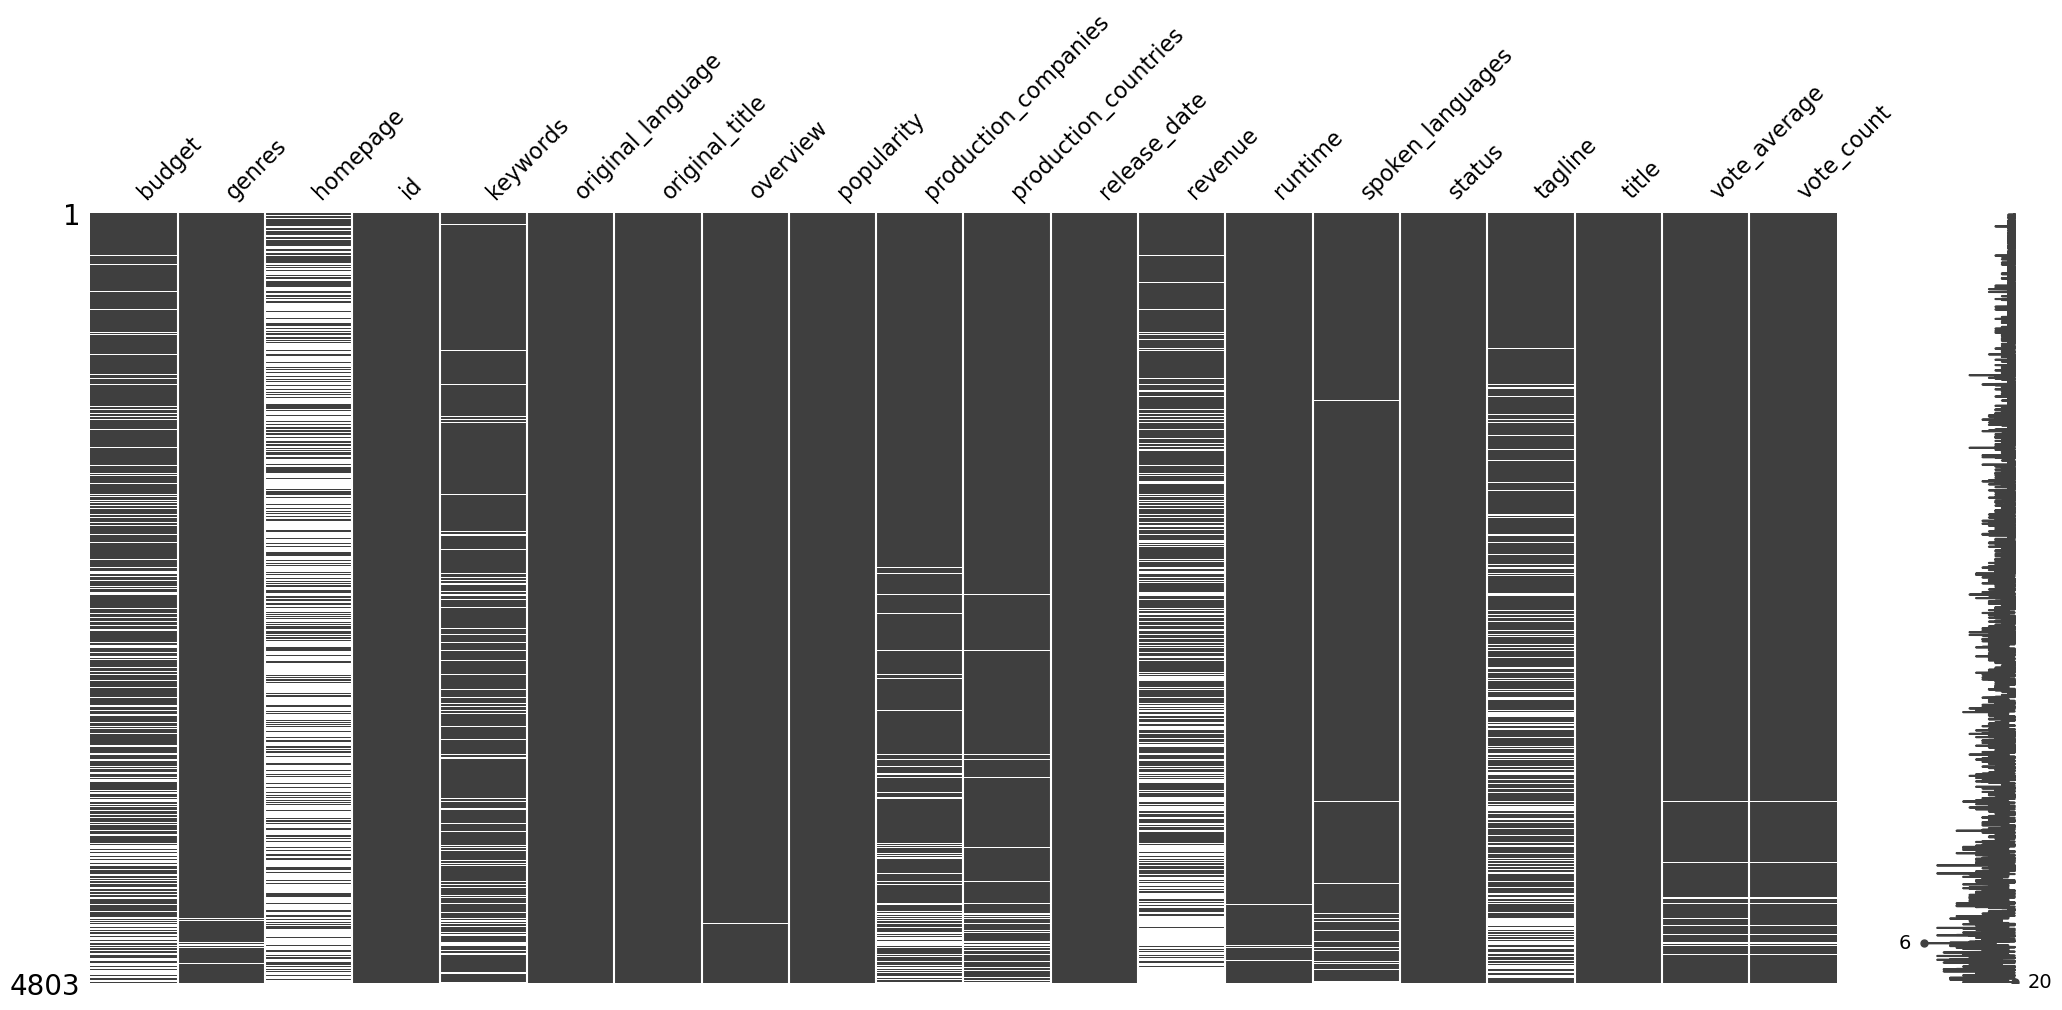

In [73]:
df_og = pd.read_csv('TMDB_movies.csv')



dict_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']

for col in dict_columns:
    if df_og[col].dtype == 'O':
        df_og[col] = df_og[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
        df_og[col] = df_og[col].apply(lambda x: [item['name'] for item in x] if x else [])
        df_og[col] = df_og[col].apply(lambda x: ', '.join(x) if x else '')

df_og.replace(0, np.nan, inplace=True)
df_og.replace('', np.nan, inplace=True)

msno.matrix(df_og)

<Axes: >

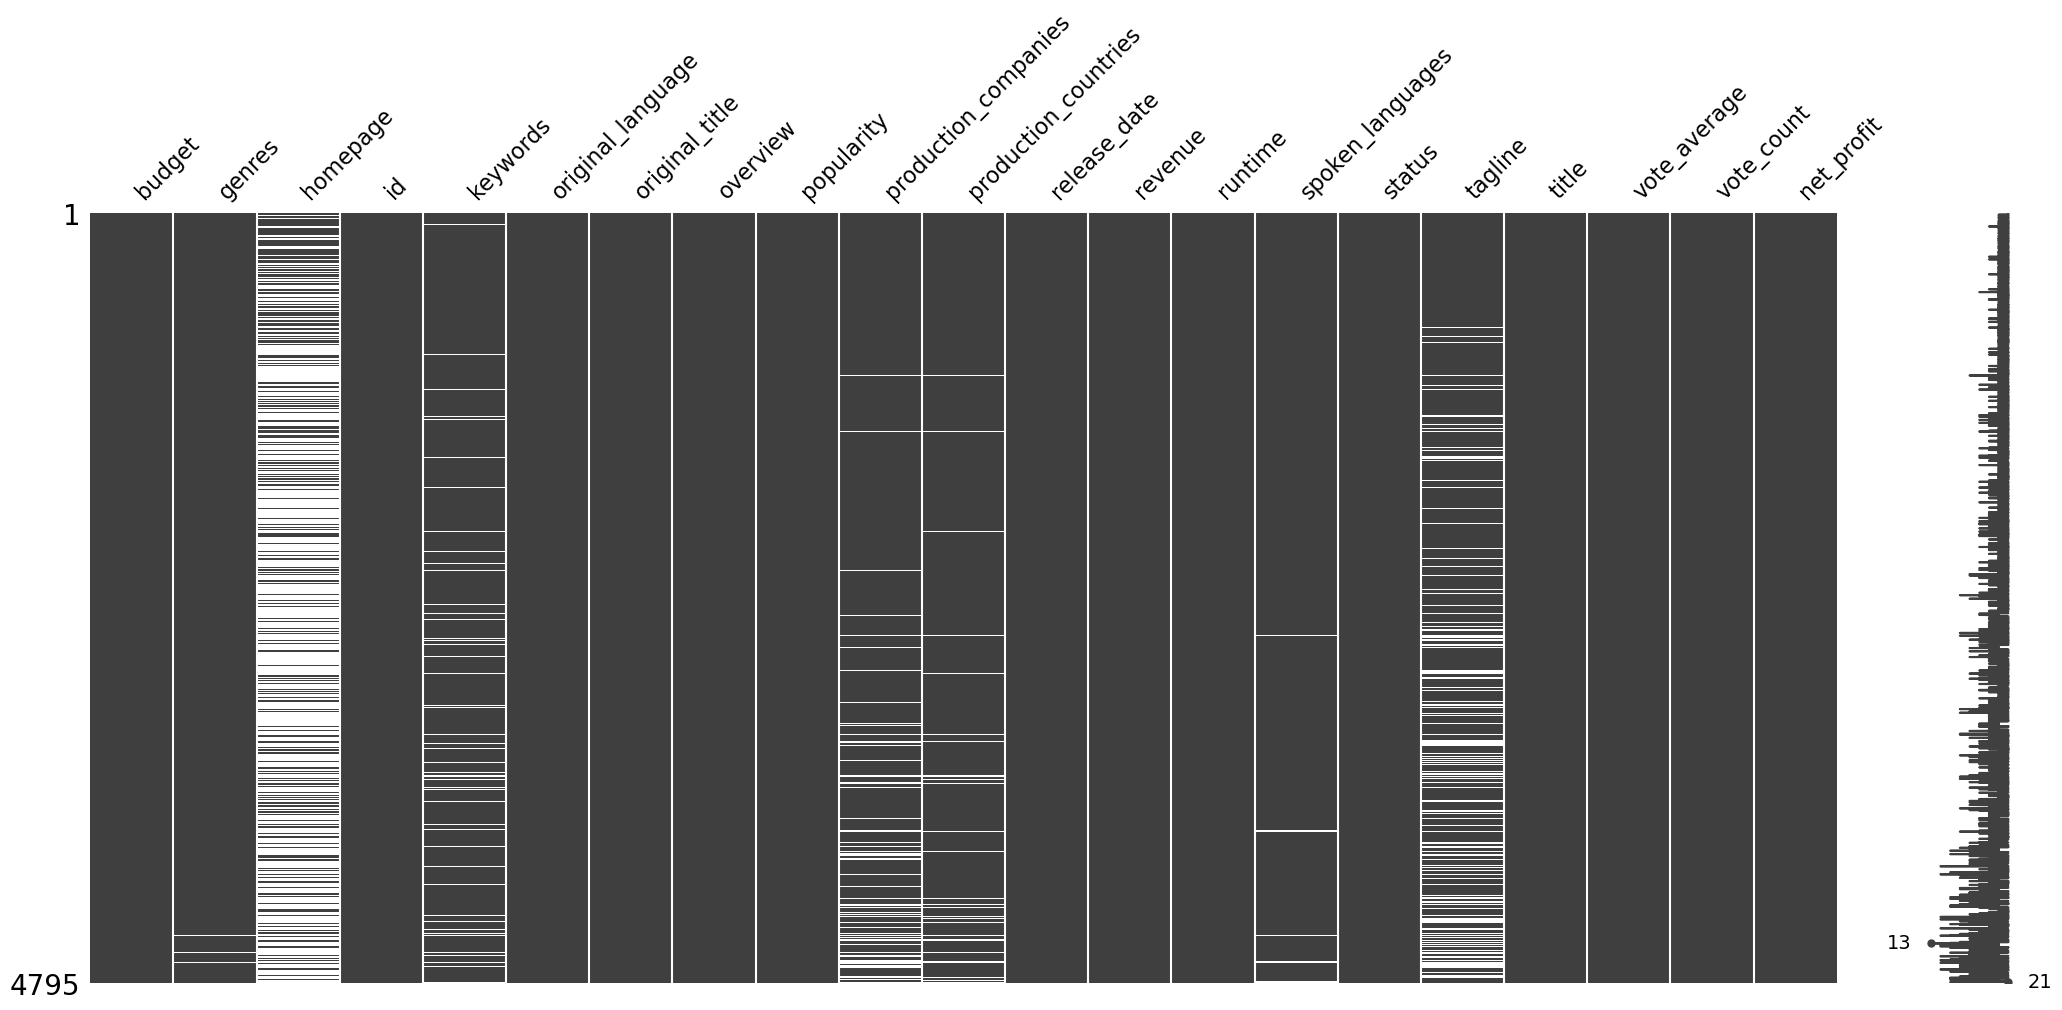

In [489]:
msno.matrix(df_released)